In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:.2f}'.format)

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go # https://plotly.com/python/getting-started/
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = "plotly"

In [2]:
# Set the data directory
DATADIR = "C:\Soumen\AIML\MSc\StockProject\datasets\stock_price"
EXTN = "csv"

In [3]:
stock_list = pd.read_csv(DATADIR+'\\final_stock_list.csv', index_col='Unnamed: 0')

In [4]:
stock_list

Company Name                  Industry  \
0                Reliance Industries Ltd.                 OIL & GAS   
1          Tata Consultancy Services Ltd.                        IT   
2                          HDFC Bank Ltd.        FINANCIAL SERVICES   
3                            Infosys Ltd.                        IT   
4                 Hindustan Unilever Ltd.            CONSUMER GOODS   
5           Steel Authority of India Ltd.                    METALS   
6                                SRF Ltd.                 CHEMICALS   
7              Balkrishna Industries Ltd.                AUTOMOBILE   
8                           MindTree Ltd.                        IT   
9                 Bharat Electronics Ltd.  INDUSTRIAL MANUFACTURING   
10            Alkyl Amines Chemicals Ltd.                 CHEMICALS   
11       Happiest Minds Technologies Ltd.                        IT   
12                  APL Apollo Tubes Ltd.                    METALS   
13  Computer Age Management Services Ltd.        FINANCIAL SERVICES   
14                  Kajaria Ceramics Ltd.            CONSUMER GOODS   

        Symbol Series     ISIN Code MCAP Class              MCAP  \
0     RELIANCE     EQ  INE002A01018   largecap 14238890328064.00   
1          TCS     EQ  INE467B01029   largecap 11884493275136.00   
2     HDFCBANK     EQ  INE040A01034   largecap  7969851834368.00   
3         INFY     EQ  INE009A01021   largecap  6777336758272.00   
4   HINDUNILVR     EQ  INE030A01027   largecap  5540568629248.00   
5         SAIL     EQ  INE114A01011     midcap   522513580032.00   
6          SRF     EQ  INE647A01010     midcap   468149633024.00   
7   BALKRISIND     EQ  INE787D01026     midcap   451018227712.00   
8     MINDTREE     EQ  INE018I01017     midcap   448268763136.00   
9          BEL     EQ  INE263A01024     midcap   445043179520.00   
10  ALKYLAMINE     EQ  INE150B01039   smallcap   205502513152.00   
11  HAPPSTMNDS     EQ  INE419U01012   smallcap   204970737664.00   
12   APLAPOLLO     EQ  INE702C01027   smallcap   202643767296.00   
13        CAMS     EQ  INE596I01012   smallcap   161744568320.00   
14  KAJARIACER     EQ  INE217B01036   smallcap   157946691584.00   

     Yahoo Symbol  
0     RELIANCE.NS  
1          TCS.NS  
2     HDFCBANK.NS  
3         INFY.NS  
4   HINDUNILVR.NS  
5         SAIL.NS  
6          SRF.NS  
7   BALKRISIND.NS  
8     MINDTREE.NS  
9          BEL.NS  
10  ALKYLAMINE.NS  
11  HAPPSTMNDS.NS  
12   APLAPOLLO.NS  
13        CAMS.NS  
14  KAJARIACER.NS

In [5]:
# Plot top companies based on marketcap
import plotly.express as px
fig = px.bar(stock_list, x='Company Name', y='MCAP', color='MCAP Class', text='MCAP')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(yaxis_tickprefix = 'Rs.', yaxis_tickformat = ',.2f')
fig.update_layout(title='Top 15 Companies based on Marketcap (INR)', 
                  uniformtext_minsize=8, 
                  uniformtext_mode='hide', 
                  width=1000, 
                  height=600)
fig.show()

In [6]:
for stock in stock_list.Symbol:
    print(stock)

RELIANCE
TCS
HDFCBANK
INFY
HINDUNILVR
SAIL
SRF
BALKRISIND
MINDTREE
BEL
ALKYLAMINE
HAPPSTMNDS
APLAPOLLO
CAMS
KAJARIACER


In [7]:
def display_plot(df):
    
    # Convert the column names from mixcase to lower case
    df.columns = map(str.lower, df.columns)
    
    # Fix date
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date',inplace=True) # Set the Date column as the index
    df = df.sort_values(['date'])
    
     # Copy the dataframe
    tempdf=df.copy(deep=True)
    
    # calculate total traded
    tempdf['total traded'] = tempdf['open'] * tempdf['volume']

    # Calculate the Simple Moving Average (SMA = 50)
    tempdf['sma50'] = tempdf['close'].rolling(50).mean()

    # Calculate the Simple Moving Average (SMA = 200)
    tempdf['sma200'] = tempdf['close'].rolling(200).mean()

    # Assign the volume color
    tempdf['volume color'] = ''
    for i in range(0, len(tempdf)):
        if tempdf['close'].iloc[i]>=tempdf['close'].iloc[i-1]:
            tempdf['volume color'].iloc[i] = 'green'
        else:
            tempdf['volume color'].iloc[i] = 'red'
             
    # Calulate Bollinger Bands
    # Define time period
    period = 20
    # Calculate the Simple Moving Average (SMA)
    tempdf['sma'] = tempdf['close'].rolling(window=period).mean()
    # Calculate the Standard deviation
    tempdf['std'] = tempdf['close'].rolling(window=period).std()
    # Calculate the upper Bollinger Band
    tempdf['upperbb'] = tempdf['sma'] + (tempdf['std']*2)
    # Calculate the upper Bollinger Band
    tempdf['lowerbb'] = tempdf['sma'] - (tempdf['std']*2)
    
    # Draw plot
    fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    row_width=[0.2, 0.2, 0.7], 
                    vertical_spacing=0.05,
                   subplot_titles=('Price chart', 'Volume', 'Total Traded (INR)'))

    fig.add_trace(go.Scatter(x=tempdf.index,
                             y=tempdf['upperbb'],
                             name='UpperBB', 
                             fill='none', 
                             marker_color='rgba(255, 0, 0, 0.1)'),
                  row=1, col=1)

    fig.add_trace(go.Scatter(x=tempdf.index,
                             y=tempdf['lowerbb'],
                             name='LowerBB', 
                             fill='tonexty',
                             marker_color='rgba(255, 0, 0, 0.1)', 
                             fillcolor='rgba(255, 0, 0, 0.1)'),
                  row=1, col=1)

    fig.add_trace(go.Scatter(x=tempdf.index,
                             y=tempdf['sma50'],
                             name='SMA50',
                             line=dict(color='#0055cc', width=1, dash='dot')),
                  row=1, col=1)
    
    fig.add_trace(go.Scatter(x=tempdf.index,
                             y=tempdf['sma200'],
                             name='SMA200', 
                             line=dict(color='#030303', width=1, dash='dot')),
                  row=1, col=1)
    
    fig.add_trace(go.Candlestick(x=tempdf.index, 
                                 open=tempdf['open'], 
                                 high=tempdf['high'], 
                                 low=tempdf['low'], 
                                 close=tempdf['close'],
                                 name='OHLC'),
                  row=1, col=1)
    
    fig.add_trace(go.Bar(x=tempdf.index, 
                         y=tempdf['volume'], 
                         marker_color=tempdf['volume color'],
                        name='Volume'), 
                  row=2, col=1)

    fig.add_trace(go.Bar(x=tempdf.index,
                             y=tempdf['total traded'],
                             name='Total traded', 
                         marker_color='purple'), 
                  row=3, col=1)

    fig.update_layout(##title='Historical stock price chart',
                      xaxis_tickfont_size=12,
                      yaxis=dict(title='Price (INR/share)',
                                 titlefont_size=14,
                                 tickfont_size=10),
                      xaxis_rangeslider_visible=False,
                      width=1000,height=800, margin=dict(l=50, r=50, b=100, t=100, pad=4),
                      template='none')

    fig.show()

# Import the data

In [8]:
# Create the list of companies
companies = [stock for stock in stock_list.Symbol]

# Dynamically create Data frames
for eachCompany in companies:
    vars()[eachCompany] = pd.DataFrame(pd.read_csv(DATADIR+'\\'+eachCompany+'.csv'))

In [9]:
# Fix date
def fix_date(df):
#     df.columns = map(str.lower, df.columns)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True) # Set the Date column as the index
    df = df.sort_values(['Date'])

In [10]:
# List all loaded data frames
%whos DataFrame

Variable     Type         Data/Info
-----------------------------------
ALKYLAMINE   DataFrame                Date   Open  <...>\n[2426 rows x 7 columns]
APLAPOLLO    DataFrame                Date   Open  <...>\n[1977 rows x 7 columns]
BALKRISIND   DataFrame                Date   Open  <...>\n[2460 rows x 7 columns]
BEL          DataFrame                Date   Open  <...>\n[2460 rows x 7 columns]
CAMS         DataFrame               Date    Open  <...>n\n[203 rows x 7 columns]
HAPPSTMNDS   DataFrame               Date    Open  <...>n\n[214 rows x 7 columns]
HDFCBANK     DataFrame                Date    Open <...>\n[2460 rows x 7 columns]
HINDUNILVR   DataFrame                Date    Open <...>\n[2460 rows x 7 columns]
INFY         DataFrame                Date   Open  <...>\n[2460 rows x 7 columns]
KAJARIACER   DataFrame                Date   Open  <...>\n[2460 rows x 7 columns]
MINDTREE     DataFrame                Date   Open  <...>\n[2460 rows x 7 columns]
RELIANCE     DataFrame    

In [11]:
display_plot(RELIANCE)

C:\Soumen\AIML\Installs\Anaconda3\envs\tf-test\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
display_plot(SAIL)

In [13]:
display_plot(KAJARIACER)

### Checking Stationarity with rolling mean and standard deviation

In [14]:
#Determine rolling statistics
rolmean = INFY['Close'].rolling(window=60).mean()
rolstd = INFY['Close'].rolling(window=60).std()
# print(rolmean, rolstd)

In [15]:
# rolmean.head(20)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

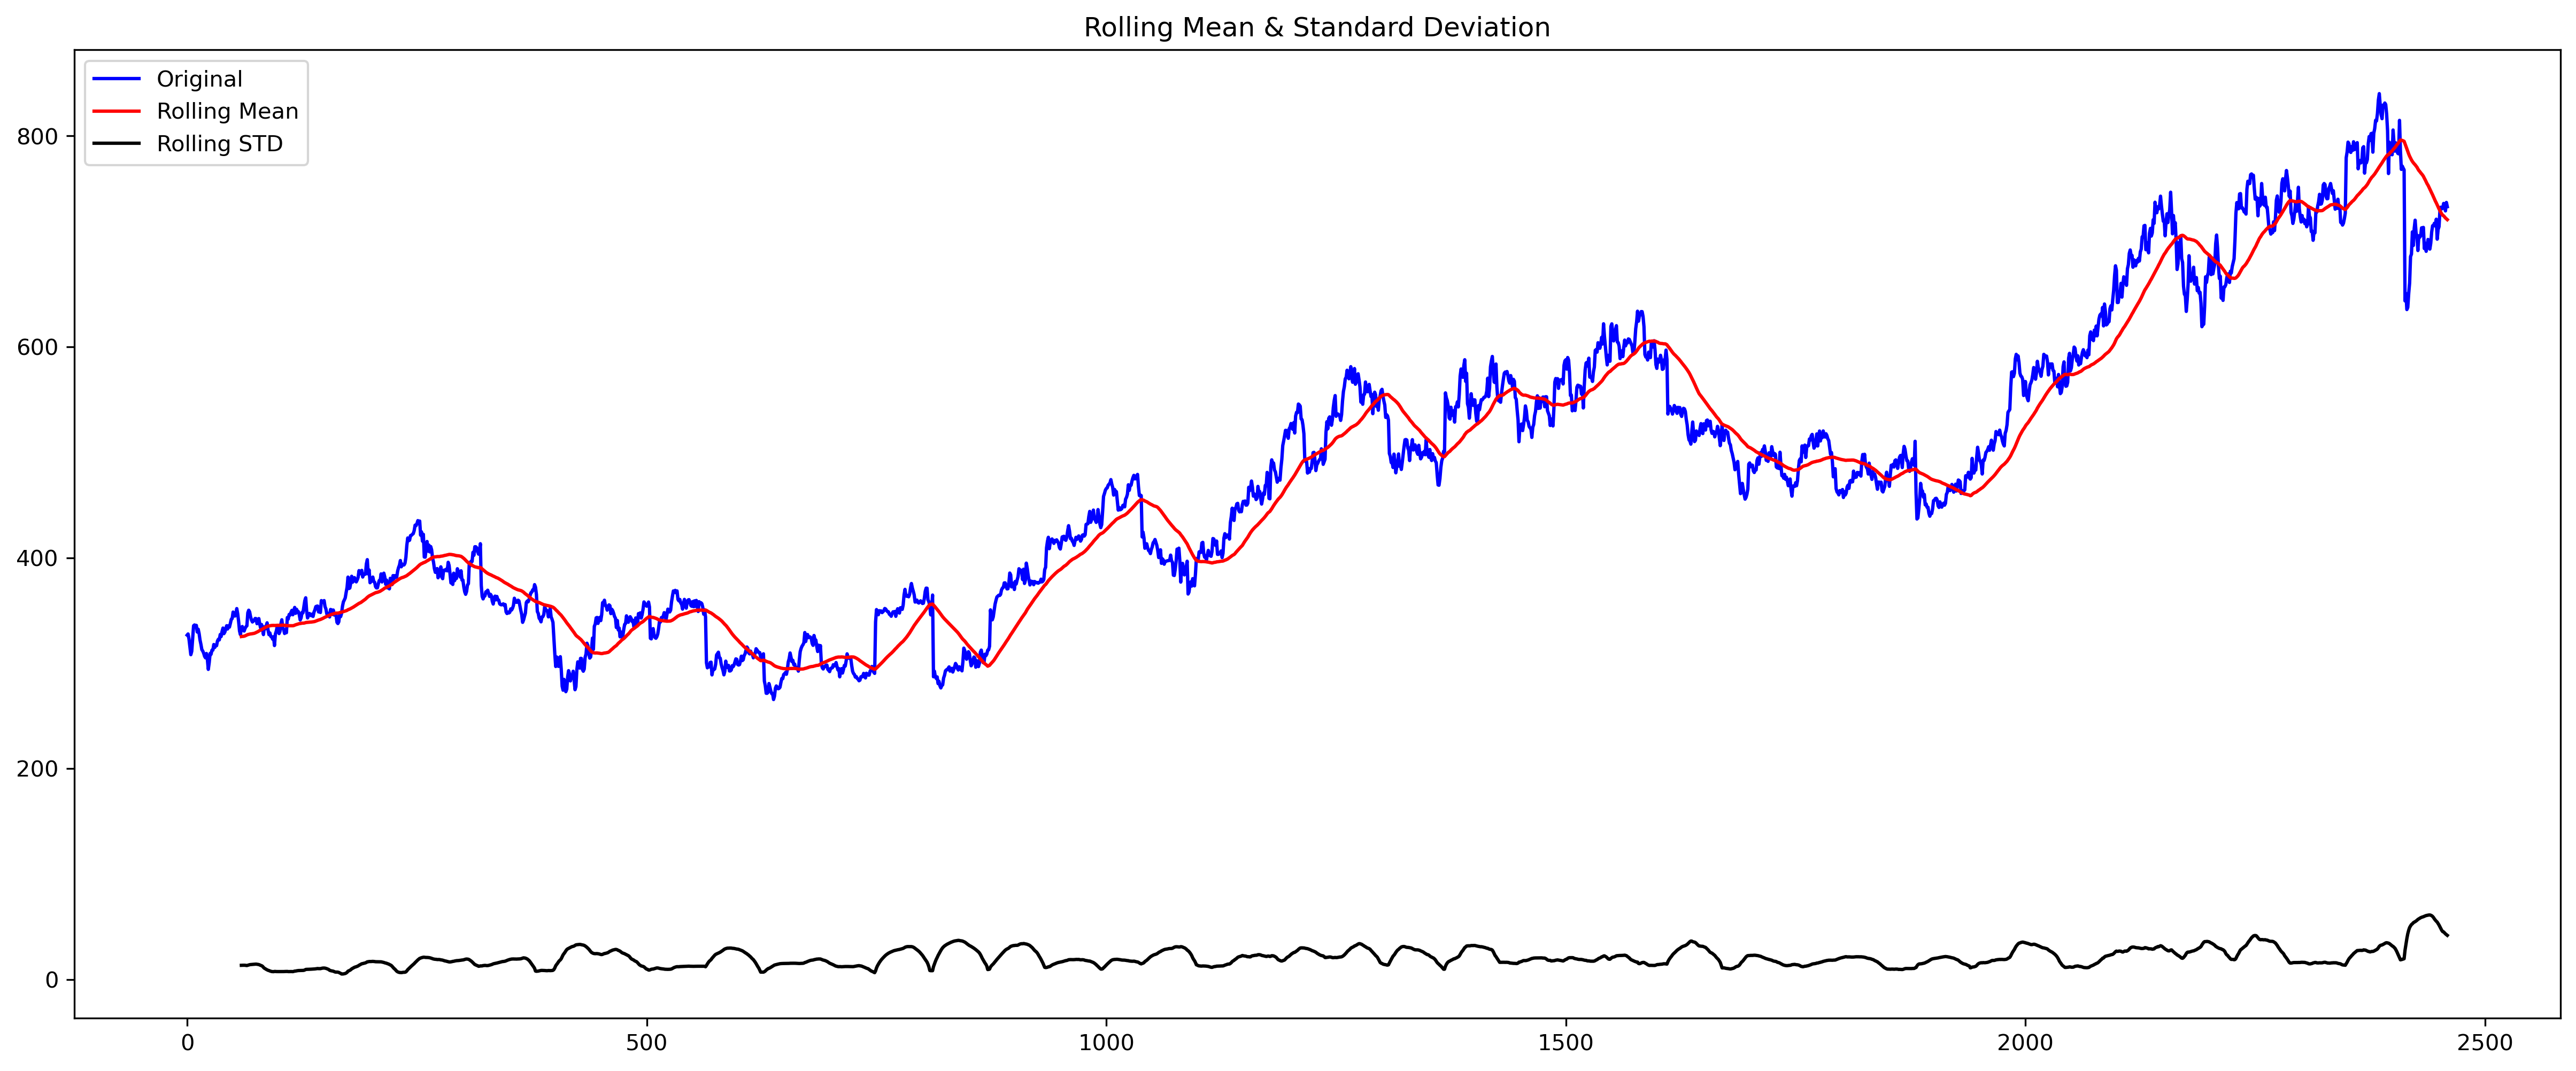

In [16]:
plt.figure(figsize=(20, 8), dpi=300)
# Plot rolling statistics
orig = plt.plot(INFY.Close, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

### Checking Stationarity with Augmented Dickey Fuller Statistical Test

In [17]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dicky-Fuller Test:')
dftest = adfuller(INFY.Close, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dicky-Fuller Test:
Test Statistic                  -0.76
p-value                          0.83
#Lags Used                       8.00
Number of Observations Used   2451.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [18]:
def test_stationarity(stock_df, r_window=12):
    #Determine rolling statistics
    movingAverage = stock_df['Close'].rolling(window=r_window).mean()
    rolSTD = stock_df['Close'].rolling(window=r_window).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20, 8), dpi=300)
    orig = plt.plot(stock_df['Close'], color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(rolSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    #from statsmodels.tsa.stattools import adfuller

    print ('Results of Dicky-Fuller Test:')
    dftest = adfuller(stock_df['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

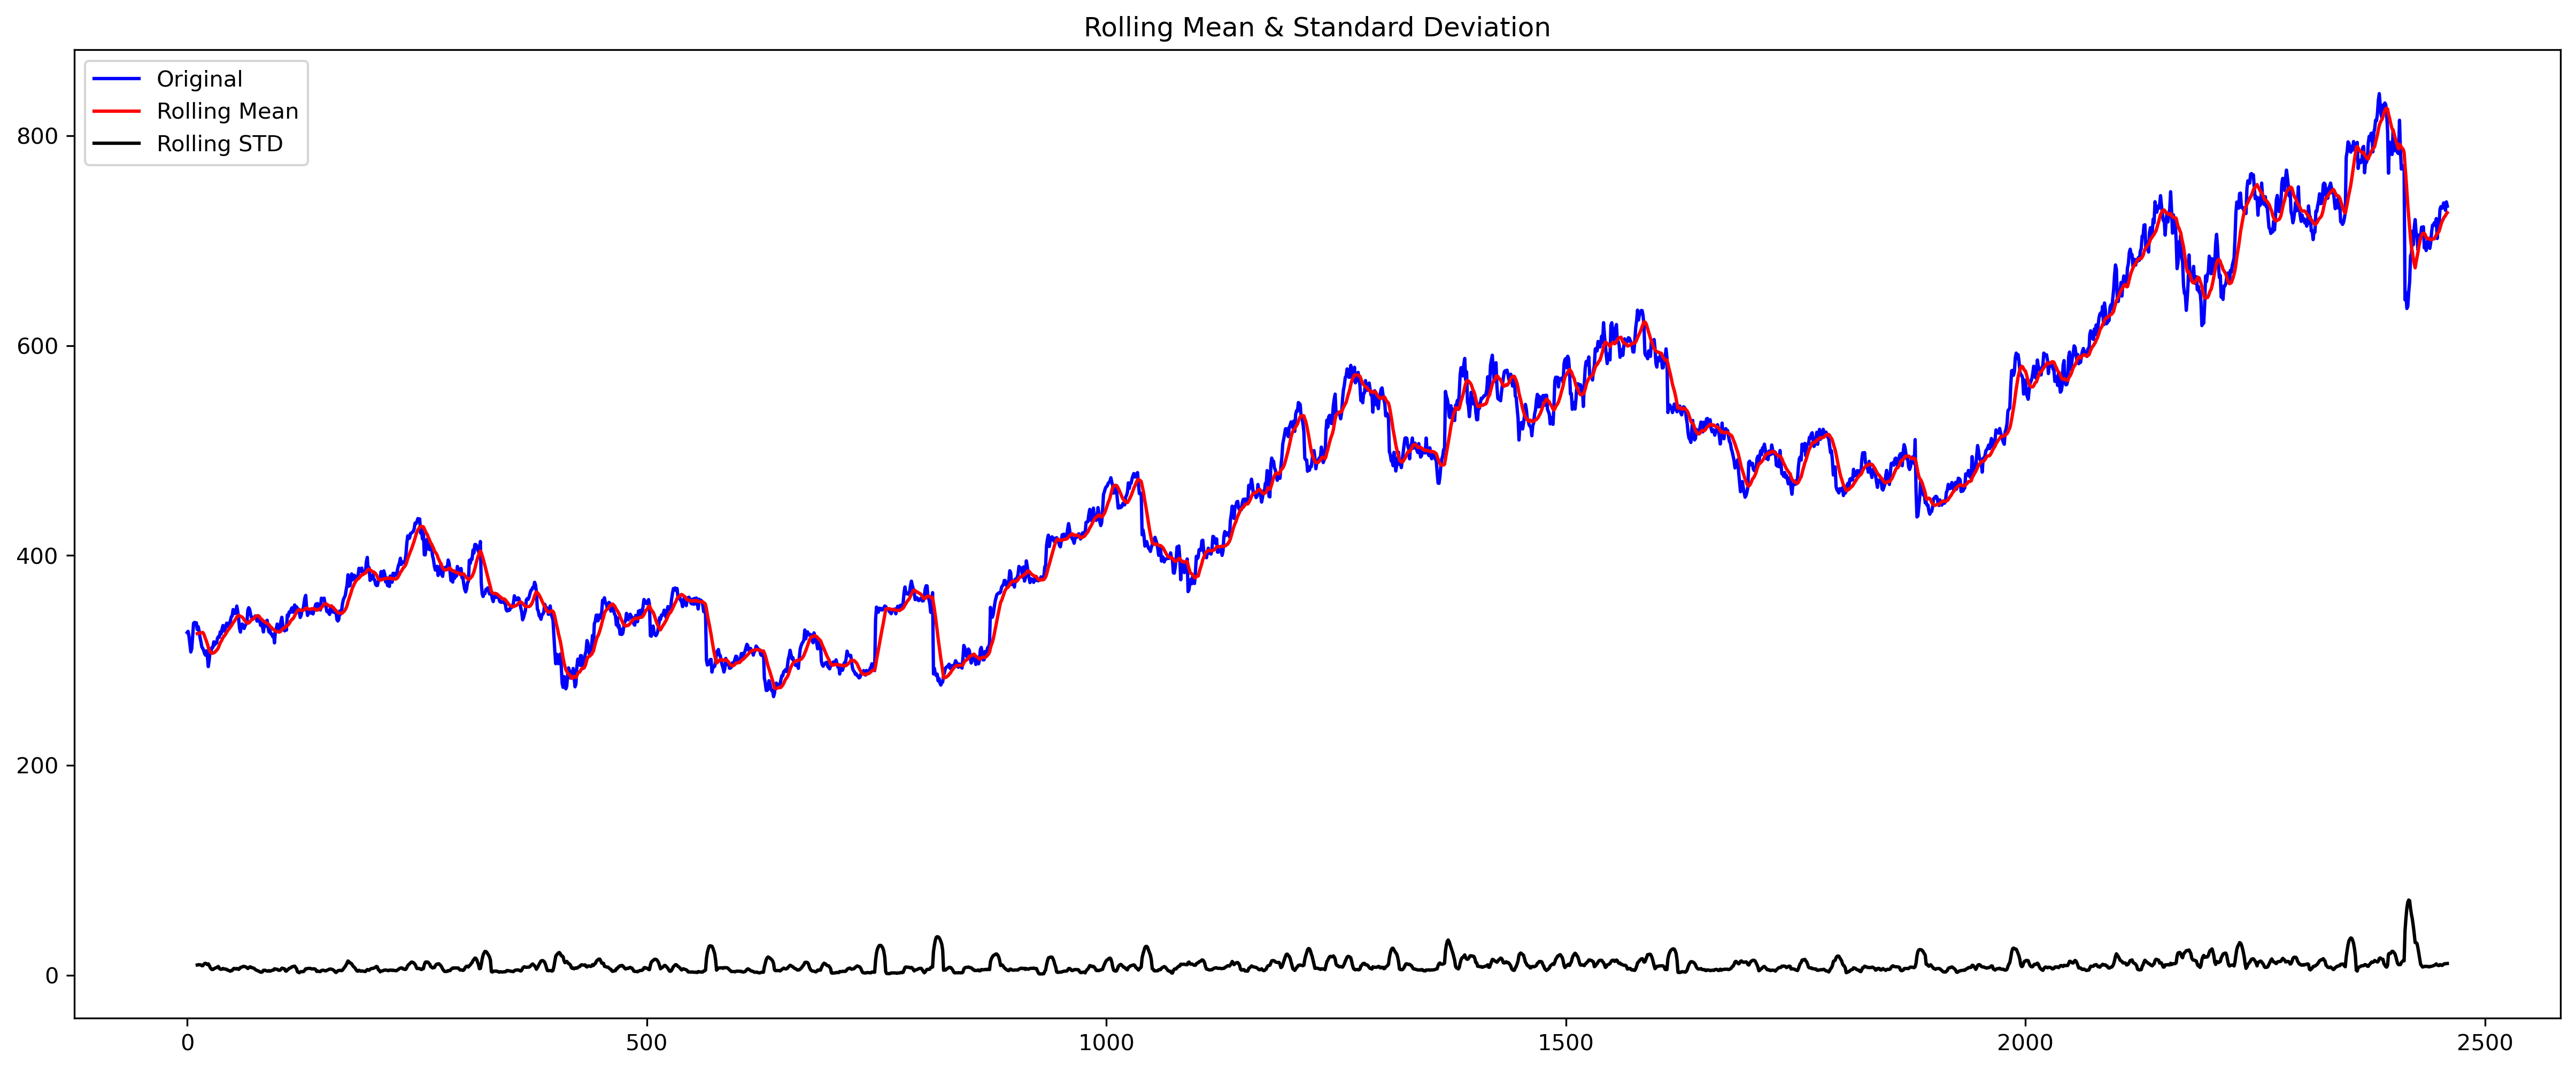

Results of Dicky-Fuller Test:
Test Statistic                  -0.76
p-value                          0.83
#Lags Used                       8.00
Number of Observations Used   2451.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [19]:
test_stationarity(INFY)

### Converting Non-Stationary data to Stationary dataset:

#### 1. Log

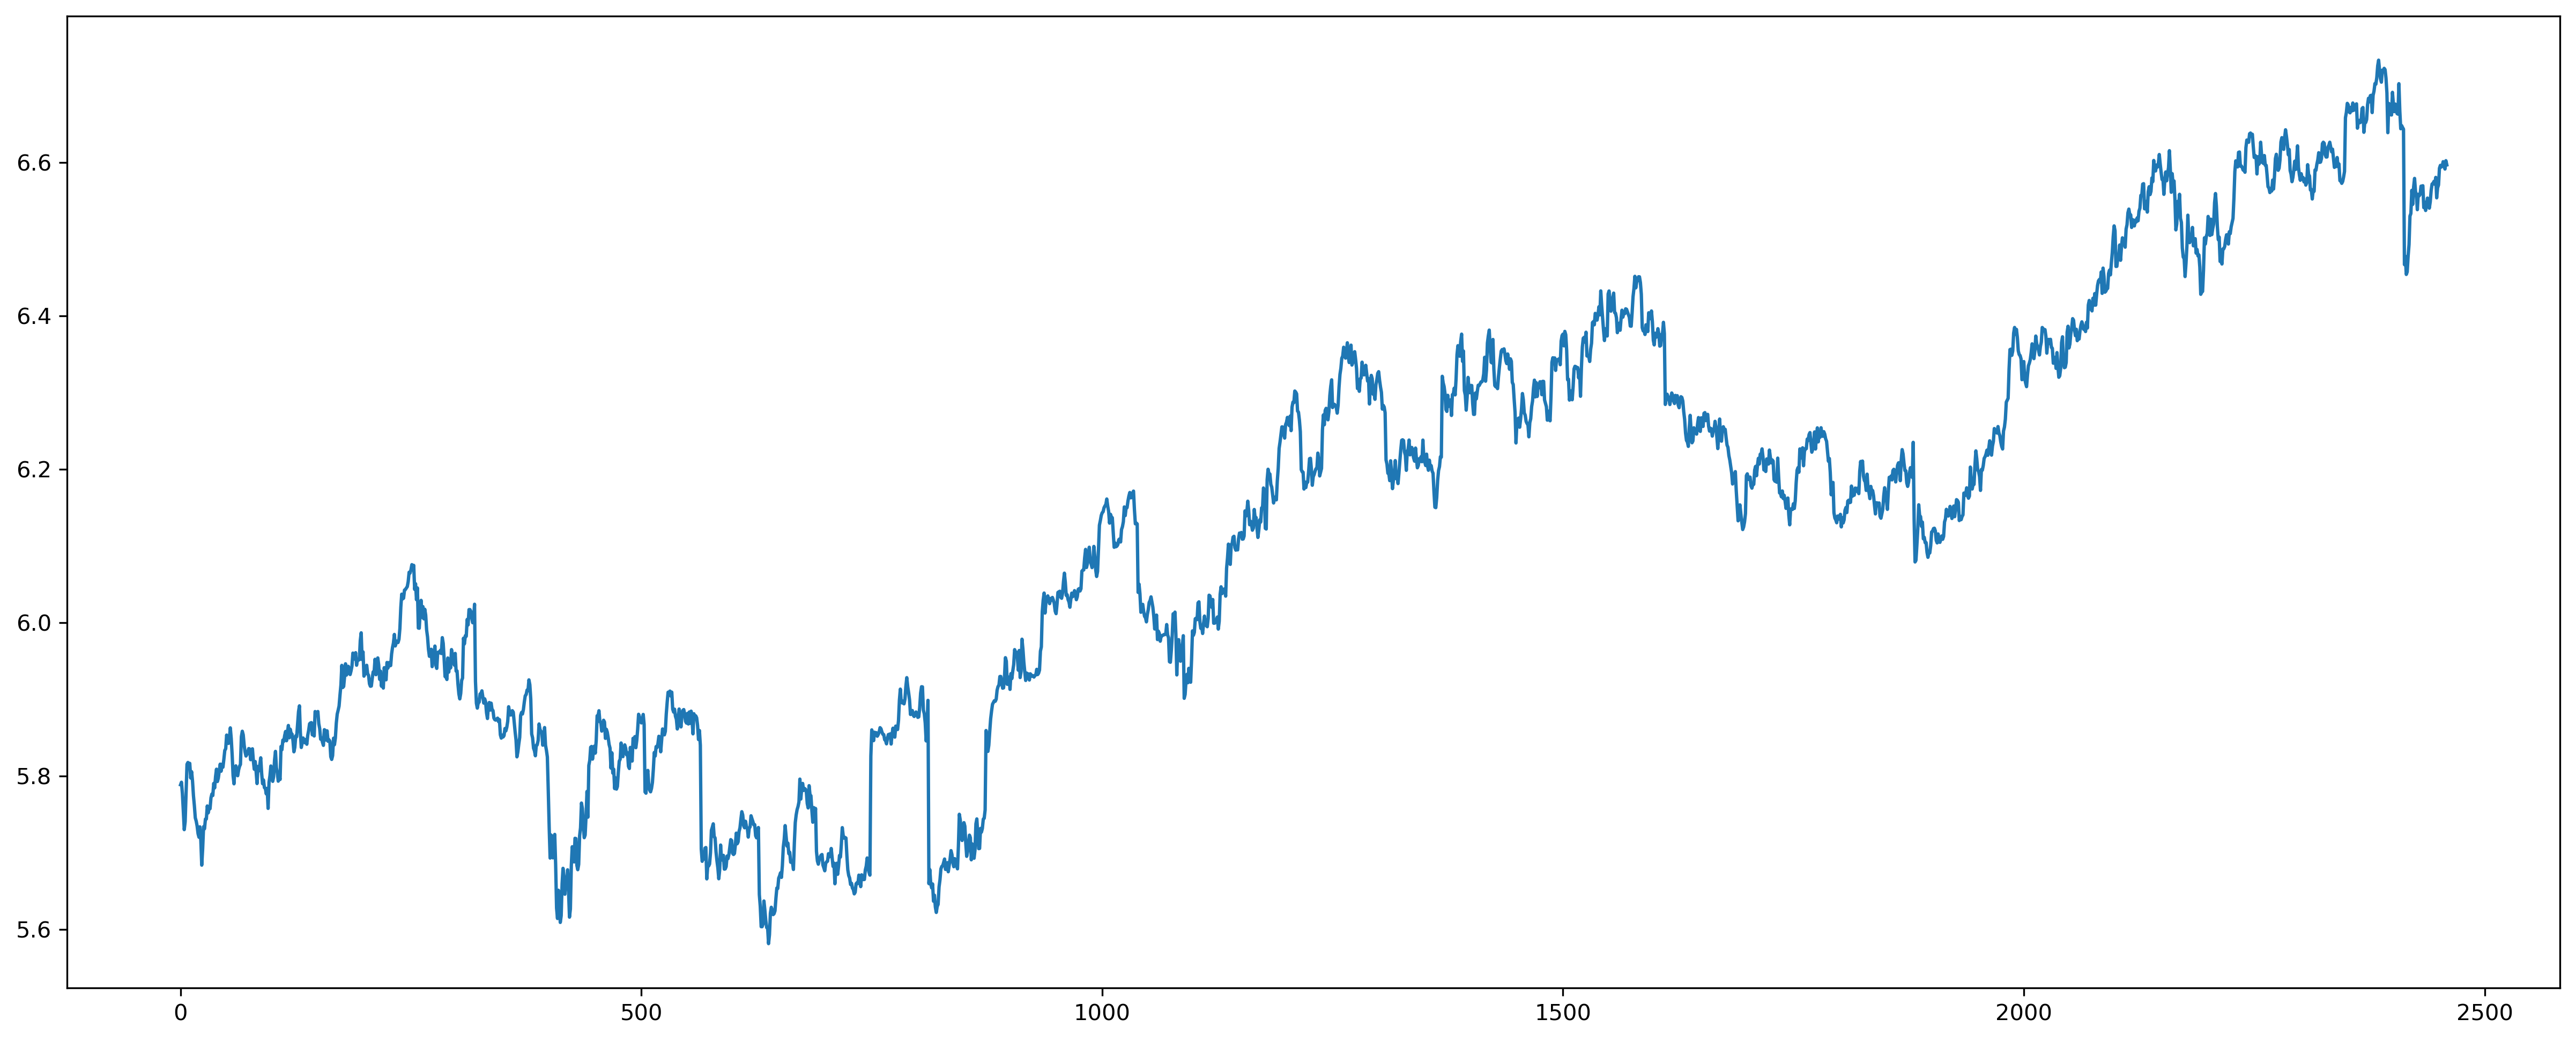

In [20]:
stock_logScale = pd.DataFrame(np.log(INFY.Close))
plt.figure(figsize=(20, 8), dpi=300)
plt.plot(stock_logScale)
plt.show()

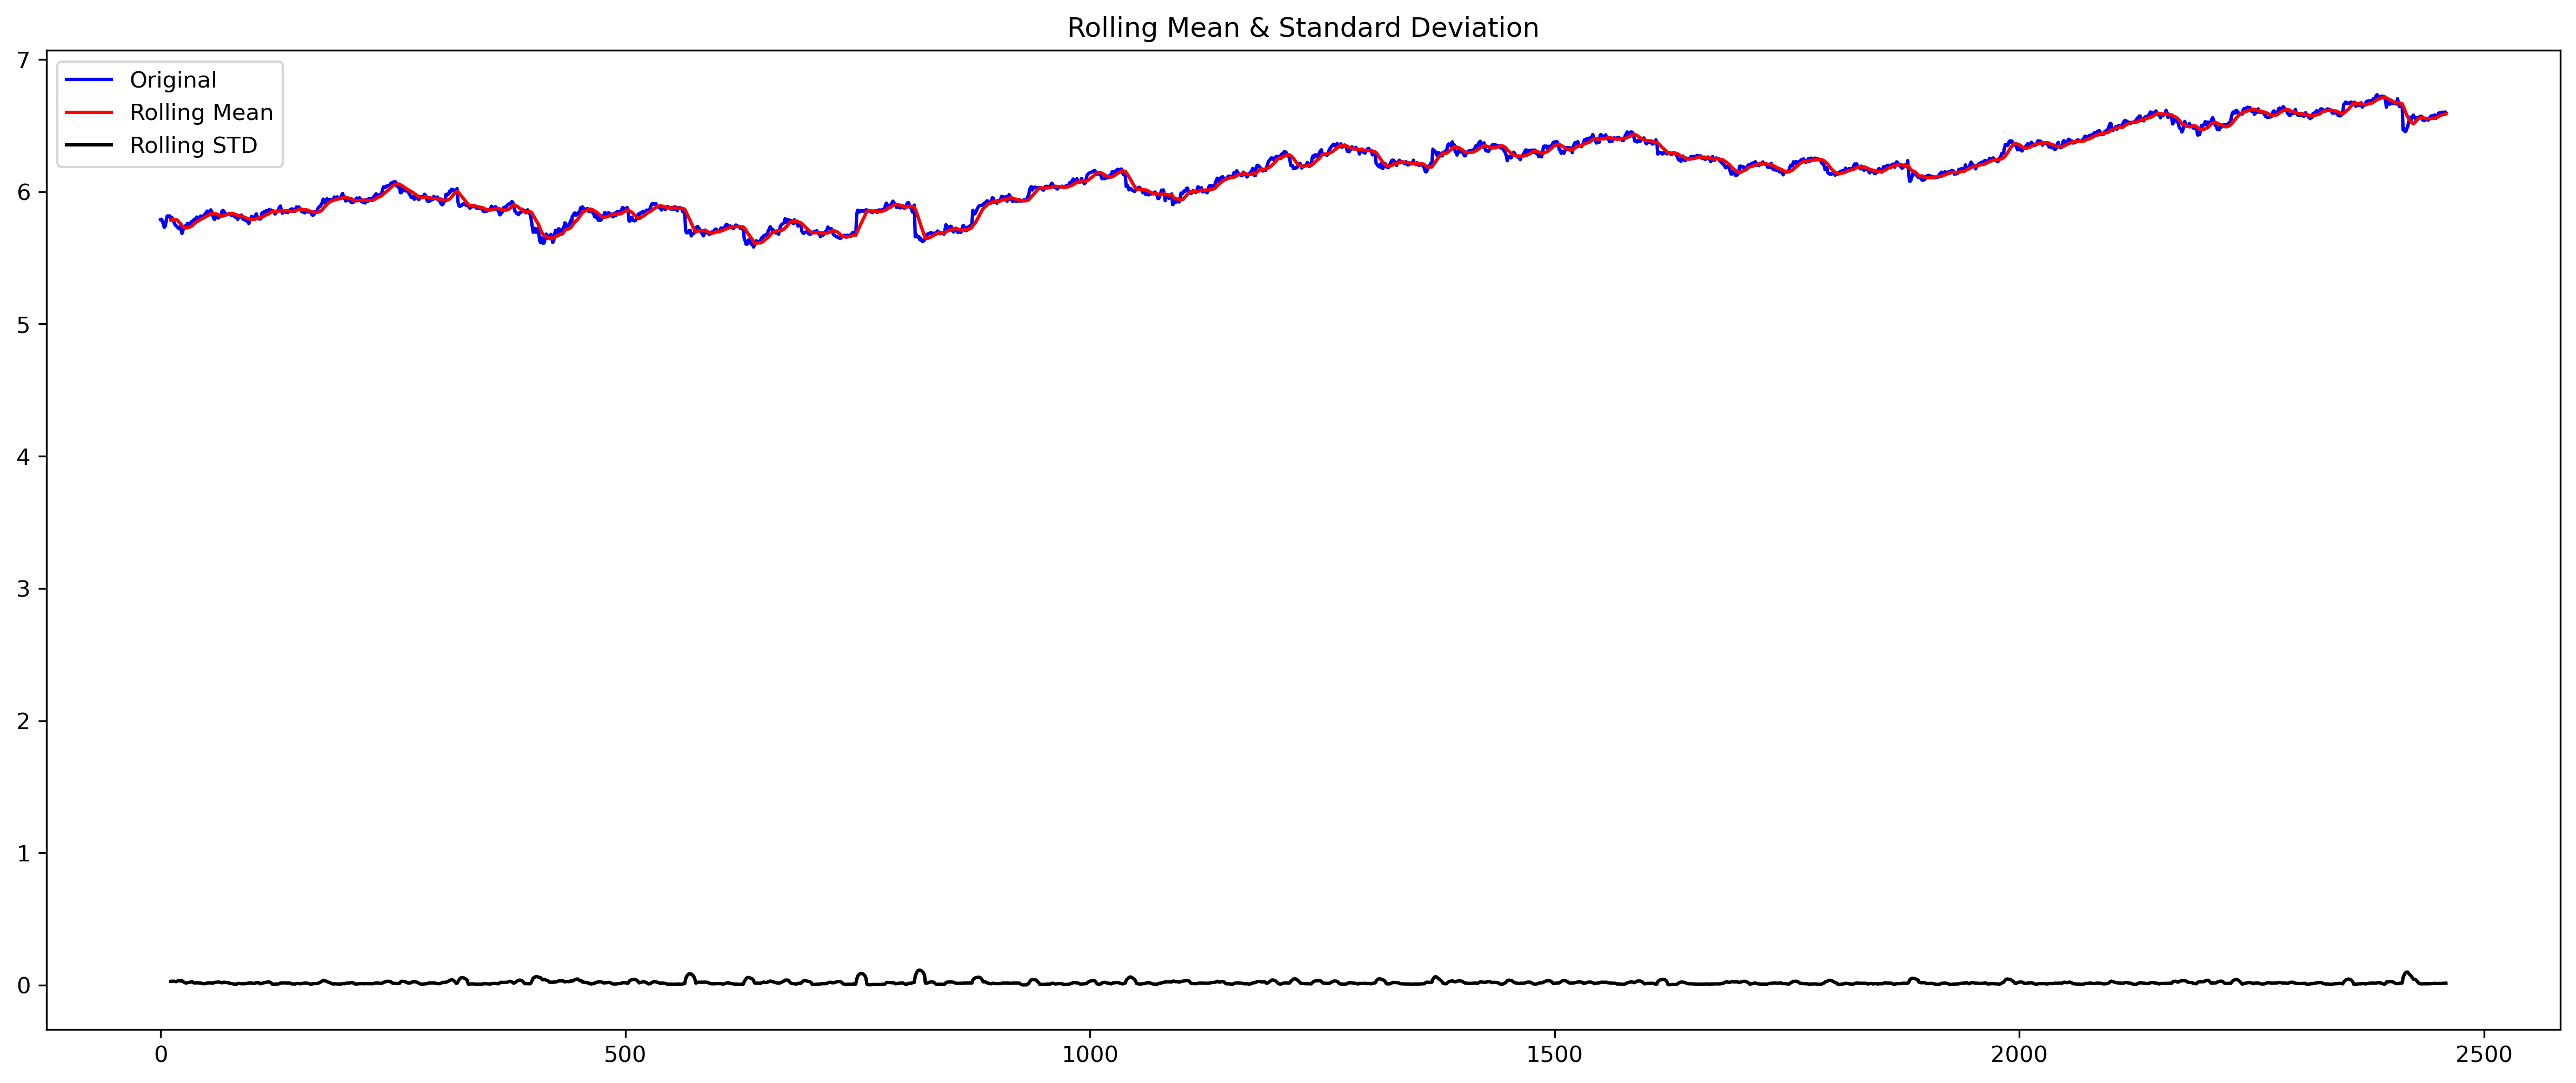

Results of Dicky-Fuller Test:
Test Statistic                  -1.19
p-value                          0.68
#Lags Used                       2.00
Number of Observations Used   2457.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [21]:
test_stationarity(stock_logScale)

### 2. Differecing Simple Moving Average

In [22]:
movingAverage = stock_logScale.rolling(window=12).mean()
datasetLogScaleMinusMovingAverage = stock_logScale - movingAverage

#Remove NAN Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

Close
11   0.01
12   0.02
13   0.01
14  -0.01
15  -0.03
16  -0.04
17  -0.05
18  -0.05
19  -0.05
20  -0.05

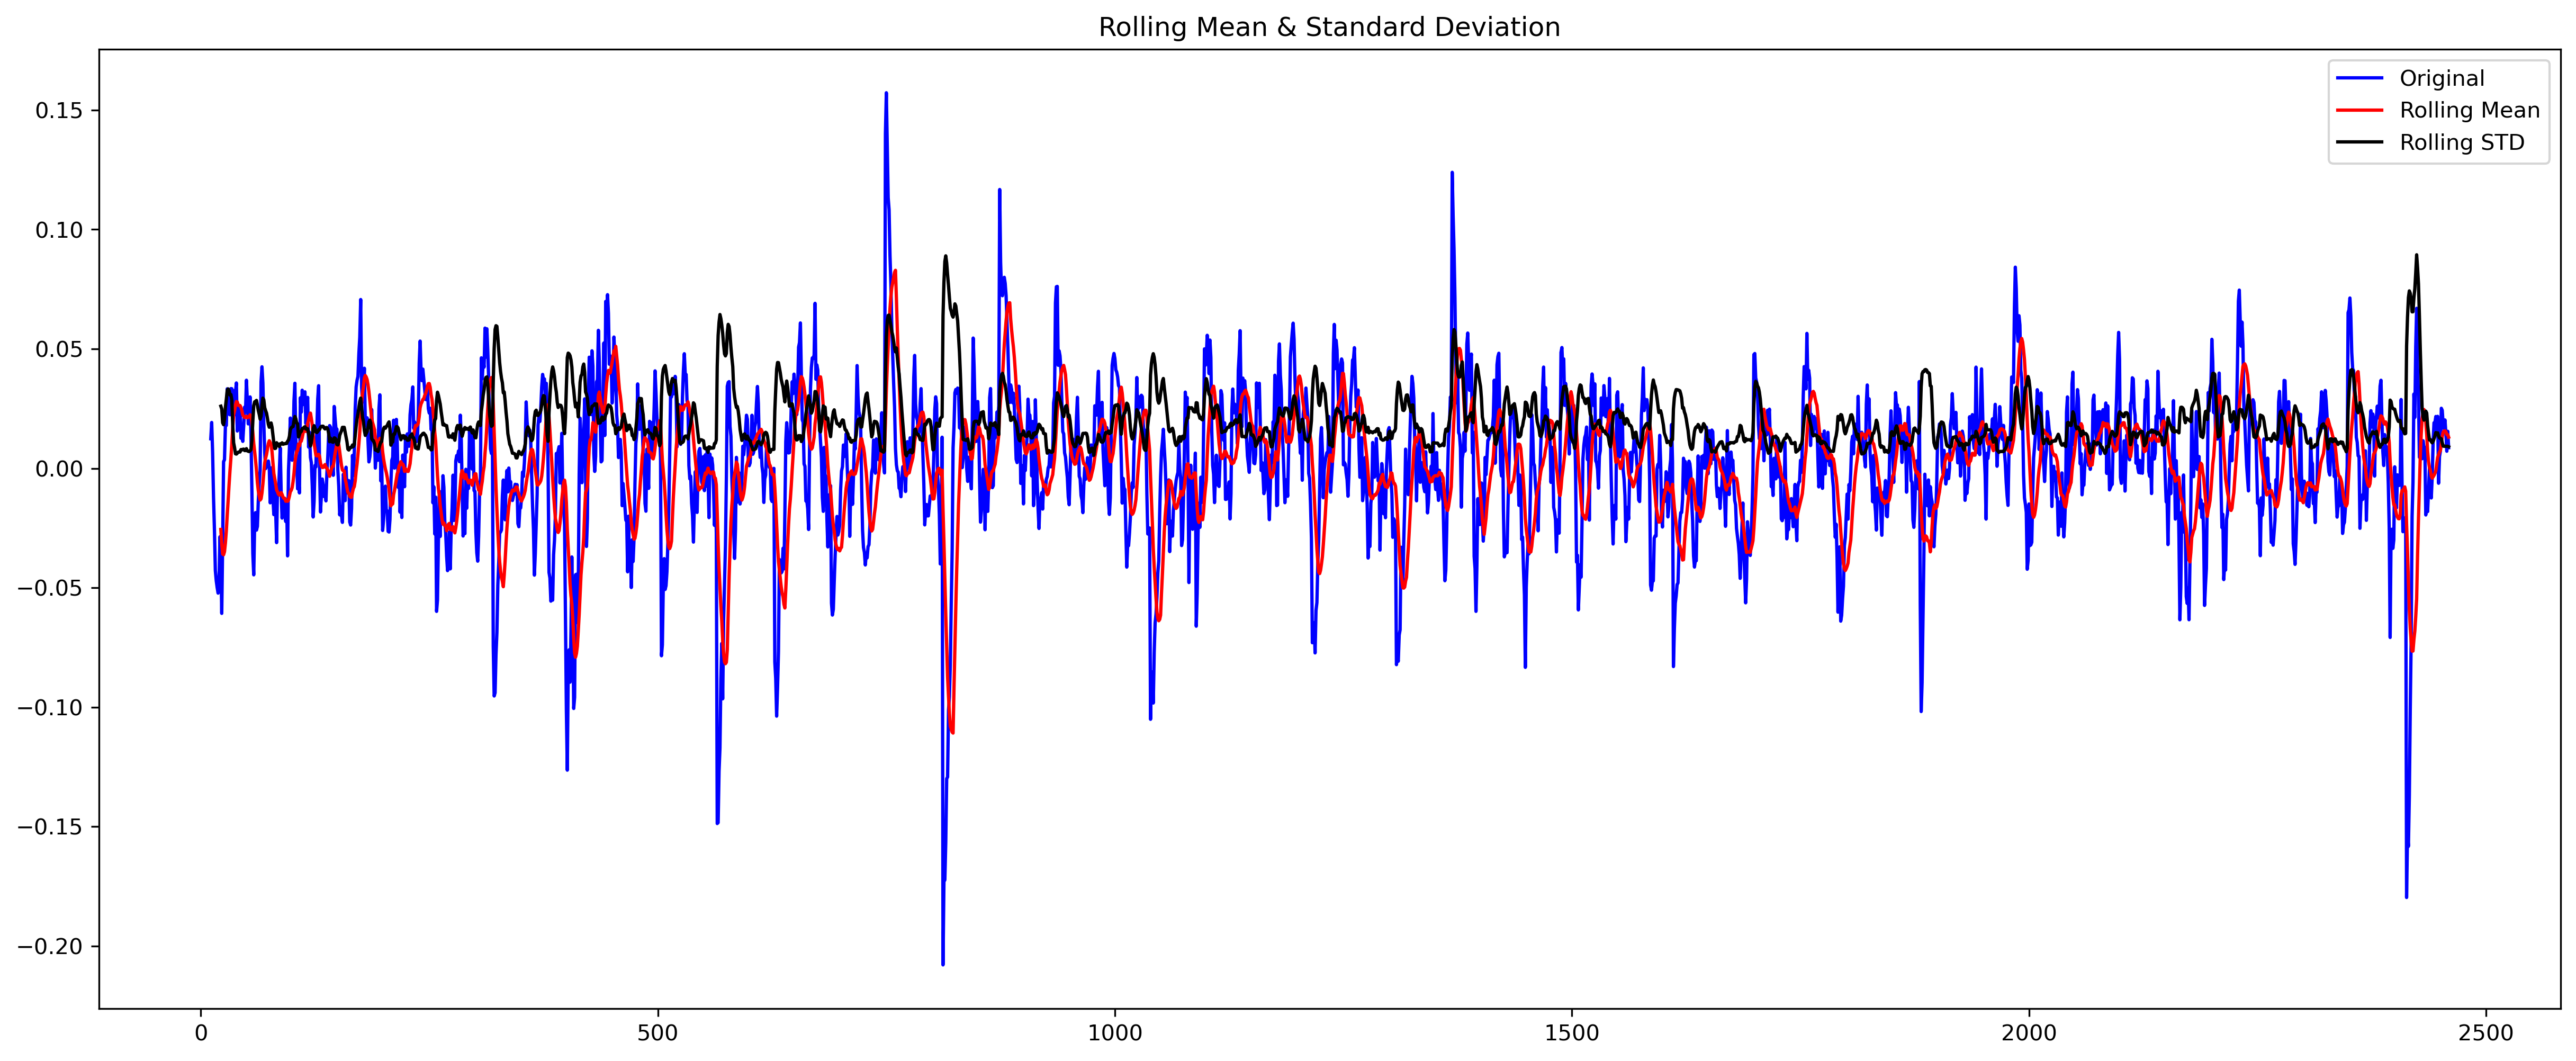

Results of Dicky-Fuller Test:
Test Statistic                 -11.36
p-value                          0.00
#Lags Used                      11.00
Number of Observations Used   2437.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [23]:
test_stationarity(datasetLogScaleMinusMovingAverage)

### 5. Seasonal Decomposition

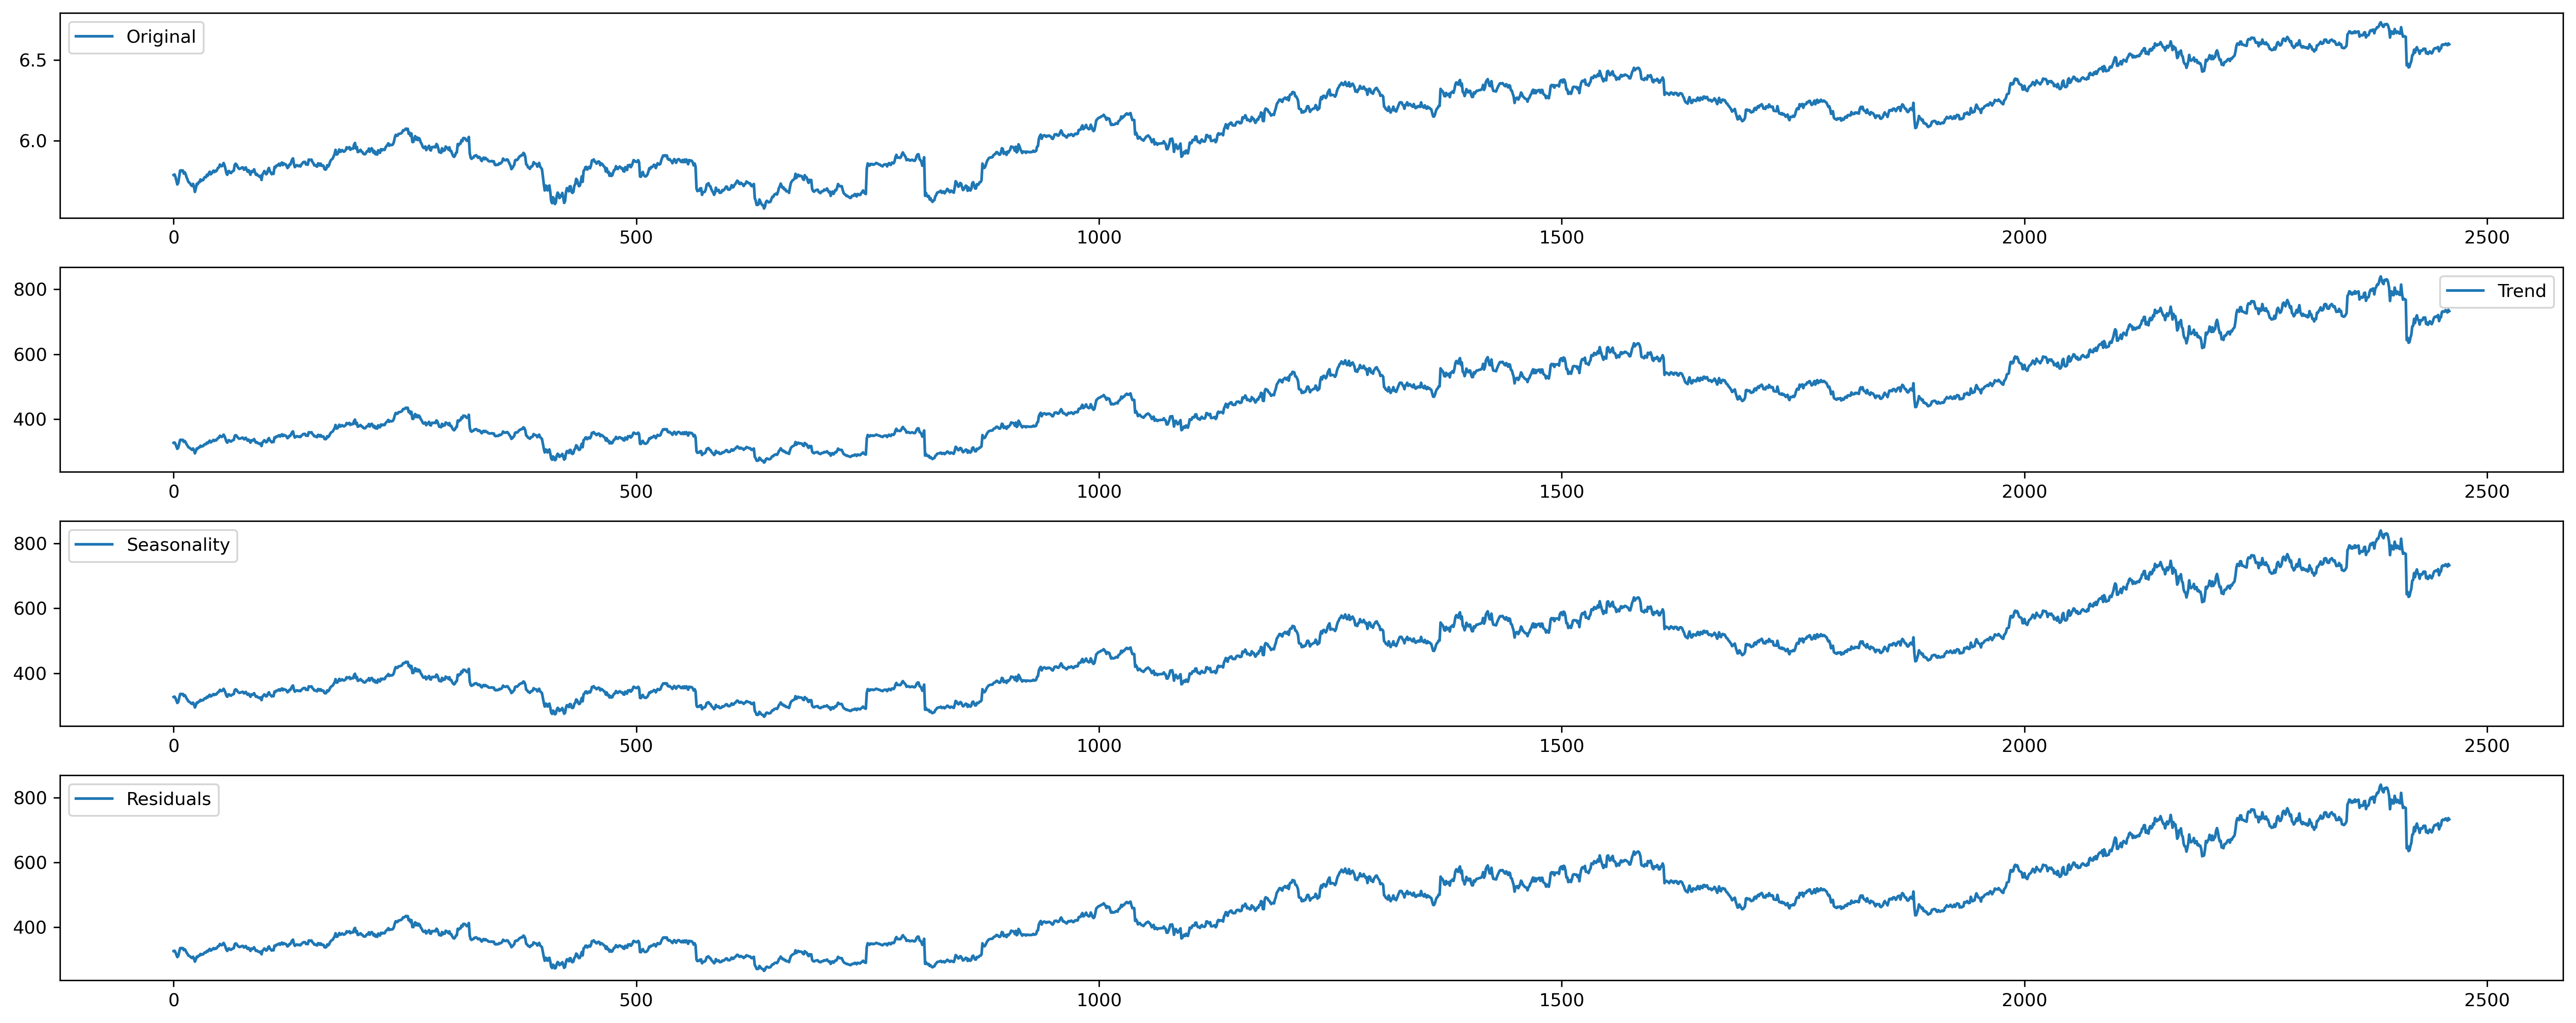

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(INFY.Close, period=1, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 8), dpi=300)
plt.subplot(411)
plt.plot(stock_logScale, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(trend, label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(trend, label = 'Residuals')
plt.legend(loc='best')

plt.tight_layout()

# decomposedLogData = pd.DataFrame(residual,columns = ['close'])
# decomposedLogData.dropna(inplace = True)
# test_stationarity(decomposedLogData)